In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.decomposition import pca
from sklearn.ensemble import GradientBoostingRegressor
%matplotlib inline

In [7]:
data = pd.read_table('./data/zhengqi_train.txt')
data.head()

,V0,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V29,V30,V31,V32,V33,V34,V35,V36,V37,target
0,0.566,0.016,-0.143,0.407,0.452,-0.901,-1.812,-2.360,-0.436,-2.114,...,0.136,0.109,-0.615,0.327,-4.627,-4.789,-5.101,-2.608,-3.508,0.175
1,0.968,0.437,0.066,0.566,0.194,-0.893,-1.566,-2.360,0.332,-2.114,...,-0.128,0.124,0.032,0.600,-0.843,0.160,0.364,-0.335,-0.730,0.676
2,1.013,0.568,0.235,0.370,0.112,-0.797,-1.367,-2.360,0.396,-2.114,...,-0.009,0.361,0.277,-0.116,-0.843,0.160,0.364,0.765,-0.589,0.633
3,0.733,0.368,0.283,0.165,0.599,-0.679,-1.200,-2.086,0.403,-2.114,...,0.015,0.417,0.279,0.603,-0.843,-0.065,0.364,0.333,-0.112,0.206
4,0.684,0.638,0.260,0.209,0.337,-0.454,-1.073,-2.086,0.314,-2.114,...,0.183,1.078,0.328,0.418,-0.843,-0.215,0.364,-0.280,-0.028,0.384


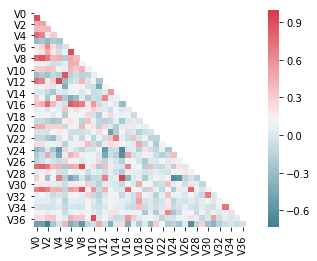

In [26]:
X = data.drop('target', axis=1)
xCorr = X.corr()
mask = np.zeros_like(xCorr, dtype=bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(xCorr, cmap=cmap, mask=mask, square=True, fmt=".3f")

In [28]:
x_train = data.values[:,0:-1]
y_train = data.values[:,-1]

In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=40)
myGBR = GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                                  learning_rate=0.03, loss='huber', max_depth=14,
                                  max_features='sqrt', max_leaf_nodes=None,
                                  min_impurity_decrease=0.0, min_impurity_split=None,
                                  min_samples_leaf=10, min_samples_split=40,
                                  min_weight_fraction_leaf=0.0, n_estimators=300,
                                  presort='auto', random_state=10, subsample=0.8, verbose=0,
                                  warm_start=False)

In [46]:
myGBR.fit(X_train, Y_train)
Y_pred = myGBR.predict(X_test)


In [48]:
myGBR.score(X_test,Y_test)

0.9100538543258924

In [34]:
mean_squared_error(Y_test, Y_pred)

0.08918637637655073

In [44]:
testData = pd.read_table('./data/zhengqi_test.txt')
x_test = testData.values[:,:]
y_test = pd.DataFrame(myGBR.predict(x_test))
y_test.to_csv('y_test.txt',index=False, header=False)

In [29]:
?GradientBoostingRegressor

In [ ]:
plt.figure(figsize=(20,16))